# Chisq alignment of Io frames

Moving this step to its own notebook because it takes time and needs to be sent to Al before we can continue with pipeline anyway

In [12]:
from shift_stack_moons.shift_stack_moons import chisq_stack
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import paths

In [13]:
fid = '04'

# load a single nod of data
stem = f'nod{fid}'

# fits file of data frames
hdul = fits.open(paths.data / f'{stem}disk.fits')
frames = hdul[0].data
hdr = hdul[0].header

In [14]:
# this step takes some time- keep in separate cell and avoid redos if possible
aligned_frames = chisq_stack(frames, showplot = True, edge_detect=False)

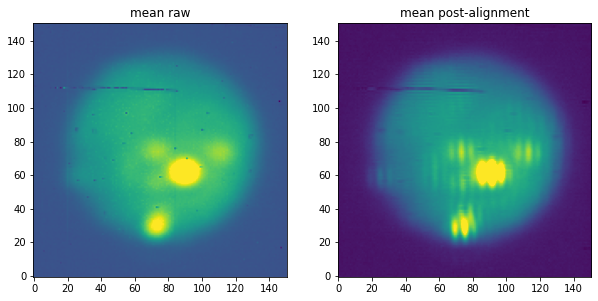

In [15]:
aligned_frames = np.array(aligned_frames)
meanframe = np.mean(aligned_frames, axis=0)
medframe = np.median(aligned_frames, axis=0)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (10,6))

ax1.imshow(meanframe, origin = 'lower', vmax = np.max(meanframe)/2.3)
ax0.imshow(np.mean(frames, axis=0), origin = 'lower', vmax = np.max(meanframe)/2.3)
ax0.set_title('mean raw')
ax1.set_title('mean post-alignment')
plt.savefig('diagnostic_plots/frame_alignment.png')
plt.show()

In [16]:
# output the aligned frames as fits
hdul[0].data = aligned_frames
hdul.writeto(paths.data / f'{stem}_aligned.fits', overwrite=True)